<a href="https://colab.research.google.com/github/devadethan452/ICT.DSA.DEVADETH/blob/main/ASSIGNMENT_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
## IMPORT REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
## READ DATASET
data = pd.read_csv("/content/drive/MyDrive/DSA DATASETS/Wine_clust.csv")

In [101]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [103]:
## THERE ARE NO MISSING VALUES

ELBOW METHOD (CLUSTERING)

In [104]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i,init = 'k-means++',n_init = 20,random_state=42)
  kmeans.fit(data)
  wcss.append(kmeans.inertia_)

In [105]:
wcss

[17592296.383508474,
 4543749.614531863,
 2370689.6867829696,
 1331903.0622637176,
 916379.1871539167,
 647326.0020260852,
 412137.5091004584,
 323211.55263465457,
 270155.69637306256,
 217887.3785603329]

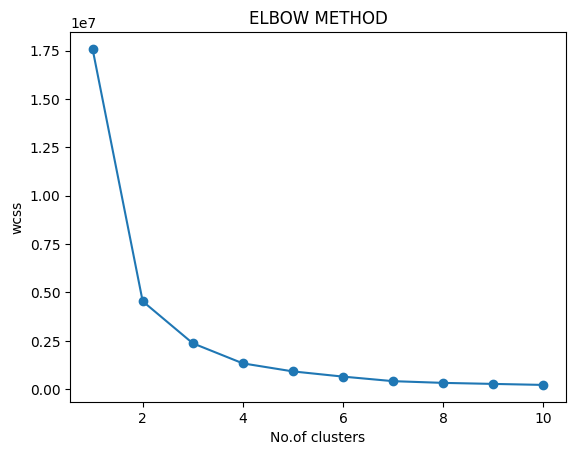

In [106]:
plt.plot(range(1, 11), wcss,marker='o')
plt.title('ELBOW METHOD')
plt.xlabel('No.of clusters')
plt.ylabel('wcss')
plt.show()

**KMeans clustering**

In [107]:
kmeans = KMeans(n_clusters = 3,init = 'k-means++',random_state=42)
kmeans.fit(data)
y_pred = kmeans.predict(data)

In [108]:
y_pred

array([1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0], dtype=int32)

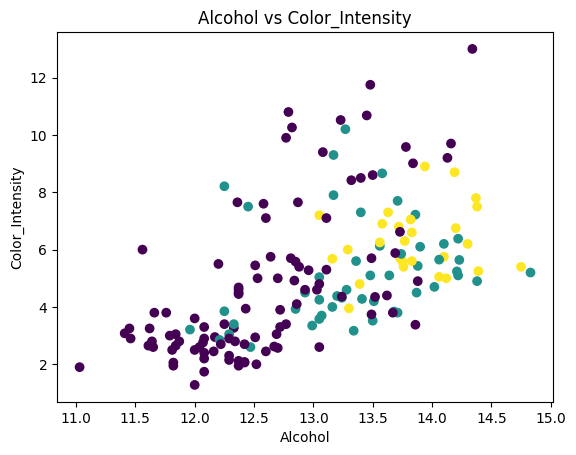

In [120]:
plt.scatter(data['Alcohol'],data['Color_Intensity'], c = y_pred)
plt.title('Alcohol vs Color_Intensity')
plt.xlabel('Alcohol')
plt.ylabel('Color_Intensity')
plt.show()

# **Agglomerative Clustering**

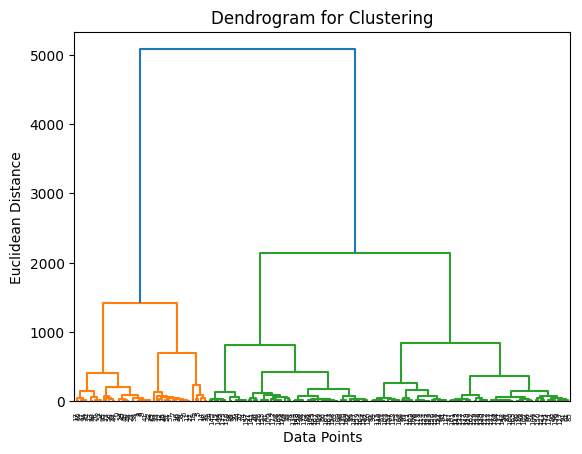

In [122]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(data, method='ward'))
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.title('Dendrogram for Clustering')
plt.show()

In [123]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(data)
y_hc

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1])

**Silhouette Score**

In [125]:
from sklearn.metrics import silhouette_score
sil_ahc=silhouette_score(data,y_hc)
sil_ahc

0.5644796401732071

# **DBSCAN**

In [126]:
data.shape

(178, 13)

In [128]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=3,min_samples=3)
db=db.fit_predict(data)

In [129]:
np.unique(db)

array([-1])

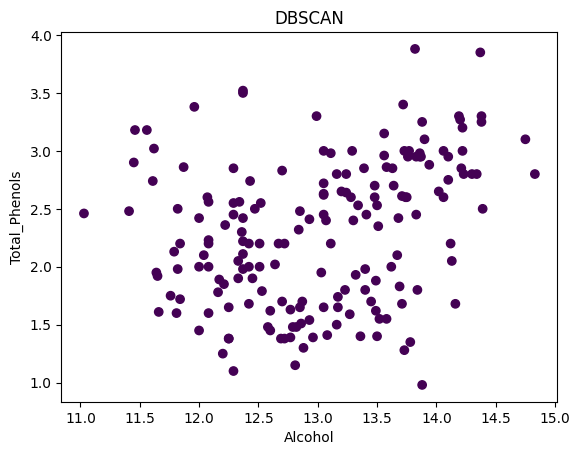

In [130]:
data['DBSCAN']=db
data.head()
plt.scatter(data['Alcohol'], data['Total_Phenols'], c=data['DBSCAN'])
plt.title('DBSCAN')
plt.xlabel('Alcohol')
plt.ylabel('Total_Phenols')
plt.show()